In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Sales-Package_y_material_recycling_type_32136-0005.csv")

In [3]:
df.head()

,Year,Types of Material,Mechanical Recycling,Other forms of recycling,Energy recovery,Other forms of recovery,Other diposal,Total
0,2010,Glass,1923.5,1.2,0.1,1.6,0.0,1926.4
1,2010,Plastics,480.2,100.3,561.5,6.2,0.9,1149.2
2,2010,"Paper, paperboard and cardboard",1112.2,41.3,1.5,19.0,0.8,1174.8
3,2010,Metals,371.4,4.0,0.0,2.1,0.0,377.6
4,2010,aluminum,67.5,0.8,0.0,0.6,0.0,68.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      99 non-null     int64  
 1   Types of Material         99 non-null     object 
 2   Mechanical Recycling      99 non-null     float64
 3   Other forms of recycling  99 non-null     float64
 4   Energy recovery           99 non-null     float64
 5   Other forms of recovery   99 non-null     float64
 6   Other diposal             99 non-null     float64
 7   Total                     99 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df.describe().round(2) 

,Year,Mechanical Recycling,Other forms of recycling,Energy recovery,Other forms of recovery,Other diposal,Total
count,99.00,99.00,99.00,99.00,99.00,99.00,99.00
mean,2015.00,906.52,18.74,231.16,2.50,64.76,1320.42
std,3.18,1311.21,38.49,379.96,11.08,142.13,1692.45
min,2010.00,0.00,0.00,0.00,0.00,0.00,60.50
25%,2012.00,2.60,0.00,0.00,0.00,0.00,271.40
50%,2015.00,331.90,0.00,0.00,0.00,0.00,712.10
75%,2018.00,1173.35,17.45,426.35,0.00,6.35,1349.70
max,2020.00,5098.10,224.00,1213.80,77.50,495.00,6436.00


In [6]:
# Filter out rows with 'Total' in 'Types of Disposal/Recycling as it contains the toal for each year which is not useful to us'
df = df[~df['Types of Material'].str.contains('Total')]

In [7]:
df.describe().round(2) 

,Year,Mechanical Recycling,Other forms of recycling,Energy recovery,Other forms of recovery,Other diposal,Total
count,88.00,88.00,88.00,88.00,88.00,88.00,88.00
mean,2015.00,496.38,10.87,125.67,0.40,36.70,765.49
std,3.18,626.82,23.05,243.45,2.16,105.54,639.95
min,2010.00,0.00,0.00,0.00,0.00,0.00,60.50
25%,2012.00,0.82,0.00,0.00,0.00,0.00,236.20
50%,2015.00,306.05,0.00,0.00,0.00,0.00,498.25
75%,2018.00,593.65,6.88,7.62,0.00,1.32,1245.95
max,2020.00,2070.00,101.80,761.60,19.00,444.30,2091.20


#### Data insights

**Year:** 
    
    - We have data from 2010 to 2020 (10 year time span)
    
**Mechanical Recycling:** 

    - this data varies from 0 (min) to 2070 (max)
    - the average value for mechanical recycling is 496.38
    - the standard deviation is high (626.82) suggesting significant amount of variation in the data
    - the maximum value is 2070 , which is significantly higher than the third percentile (Q3) value of 593.65 suggesting the possibility of outliers on the higher end of the distribution
    
**Other forms of recycling:** 

    - this data varies from 0 (min) to 101.80 (max)
    - the average value for other forms of recycling is 10.87
    - the standard deviation is 23.05 indicating moderate variation in the data
    - the values for min, first percentile (Q1) and second percentile (Q2) are all zero but this value jumps to 6.87 in the third percentile (Q3)
    - the maximum value is 101.8 , which is significantly higher than the third percentile (Q3) value of 6.87 suggesting the possibility of outliers on the higher end of the distribution


**Energy recovery:** 

    - this data varies from 0 (min) to 761.6 (max)
    - the average value for energy recovery is 125.67
    - the standard deviation is significantly nominal at 243.45
    - the values for min, first percentile (Q1) and second percentile (Q2)  and third percentile (Q3) are all zero but this value jumps to 7.62 in the third percentile (Q3)
    - the maximum value is 761.6, which is significantly higher than the third percentile (Q3) value of 7.62 suggesting the possibility of outliers on the higher end of the distribution

**Other forms of recovery:**

    - this data varies from 0 (min) to 19 (max)
    - the average value for other forms of recovery is 0.4
    - the standard deviation is 2.16 indicating moderate variation in the data
    - the values for min, first percentile (Q1), second percentile (Q2)  and third percentile (Q3) are all zero 
    - the maximum value is 77.5, which is significantly higher than the third percentile (Q3) value of 0 suggesting the possibility of outliers on the higher end of the distribution 

**Other diposal:**

    - this data varies from 0 (min) to 495.00 (max)
    - the average value for other disposal is 0.404545
    - the standard deviation is 142.13 indicating moderate variation in the data
    - the values for min, first percentile (Q1) and second percentile (Q2) all zero for even third percentile (Q3)
    - the maximum value is 19, while all other Quantiles are zero, suggesting a very highly skewed data and is not so useful to draw any meaningful conclusions



Text(0.5, 1.0, 'Total Waste Generated')

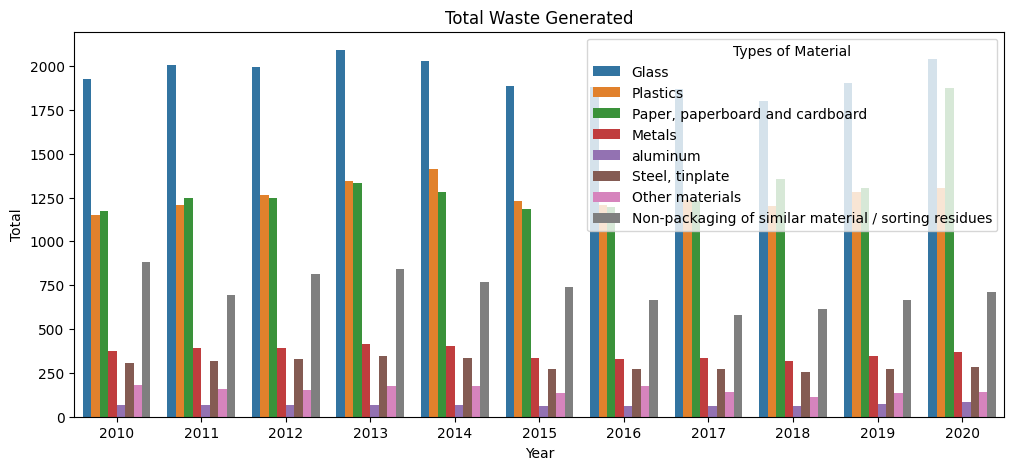

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(x= 'Year' , y = 'Total', hue = 'Types of Material' , data = df)
plt.title("Total Waste Generated")

Text(0.5, 1.0, 'Total Waste Generated')

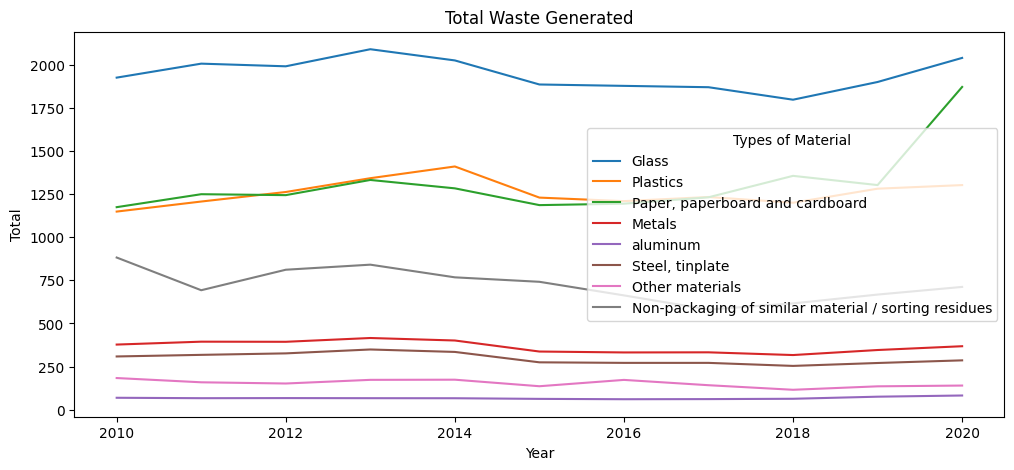

In [22]:
plt.figure(figsize=(12,5))
sns.lineplot(x= 'Year' , y = 'Total', hue = 'Types of Material' , data = df)
plt.title("Total Waste Generated")

Text(0.5, 1.0, 'Mechanical Recycling Generated by different types of material')

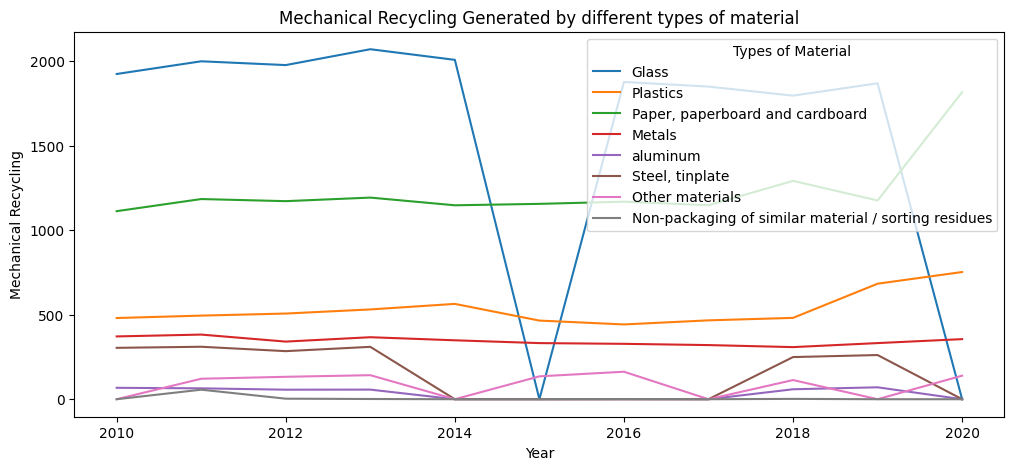

In [36]:
plt.figure(figsize=(12,5))
sns.lineplot(x= 'Year' , y = 'Mechanical Recycling', hue = 'Types of Material' , data = df)
plt.title("Mechanical Recycling Generated by different types of material") 

Text(0.5, 1.0, 'Other forms of recycling by different types of material')

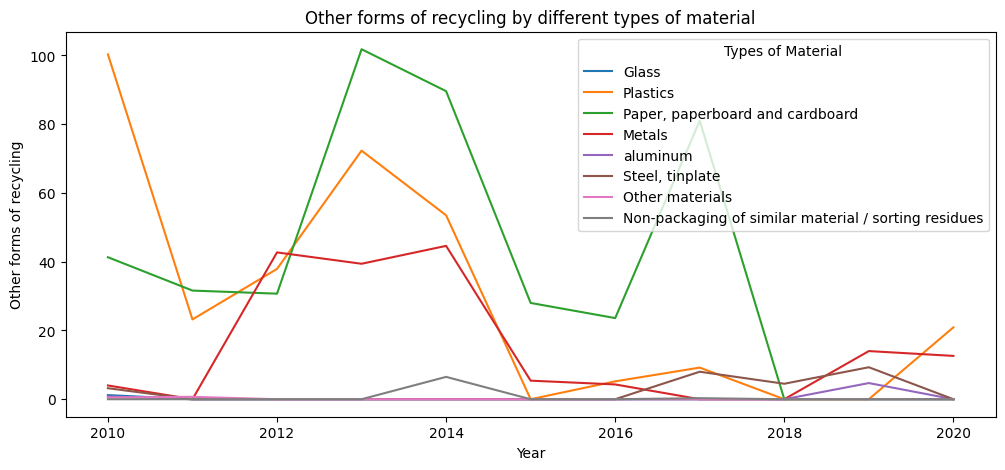

In [38]:
plt.figure(figsize=(12,5))
sns.lineplot(x= 'Year' , y = 'Other forms of recycling', hue = 'Types of Material' , data = df)
plt.title("Other forms of recycling by different types of material") 

Text(0.5, 1.0, 'Energy recovered for different types of material')

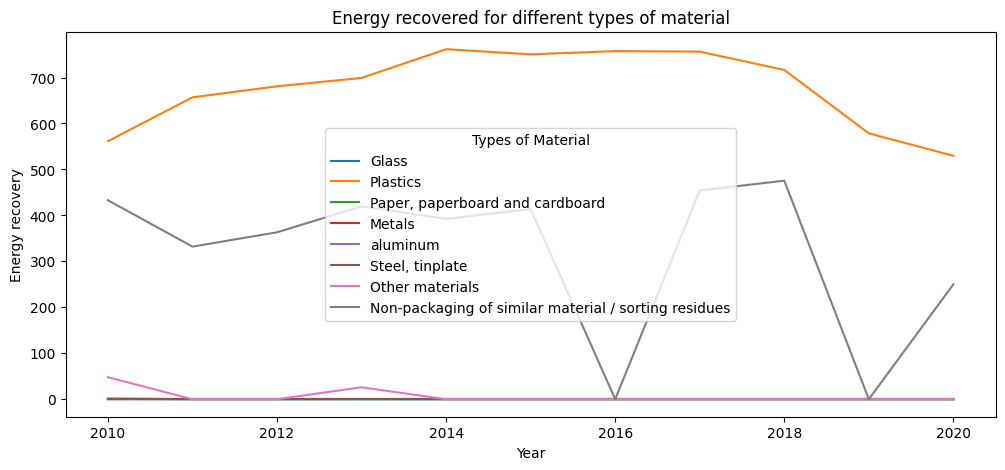

In [39]:
plt.figure(figsize=(12,5))
sns.lineplot(x= 'Year' , y = 'Energy recovery', hue = 'Types of Material' , data = df)
plt.title("Energy recovered for different types of material") 

In [31]:
df_energy = df.groupby(['Year' , 'Types of Material'])['Energy recovery'].sum()
df_energy

Year  Types of Material                                   
2010  Glass                                                     0.1
      Metals                                                    0.0
      Non-packaging of similar material / sorting residues    433.0
      Other materials                                          47.9
      Paper, paperboard and cardboard                           1.5
                                                              ...  
2020  Other materials                                           0.0
      Paper, paperboard and cardboard                           0.0
      Plastics                                                529.8
      Steel, tinplate                                           0.0
      aluminum                                                  0.0
Name: Energy recovery, Length: 88, dtype: float64

Text(0.5, 1.0, 'Total Waste Generated')

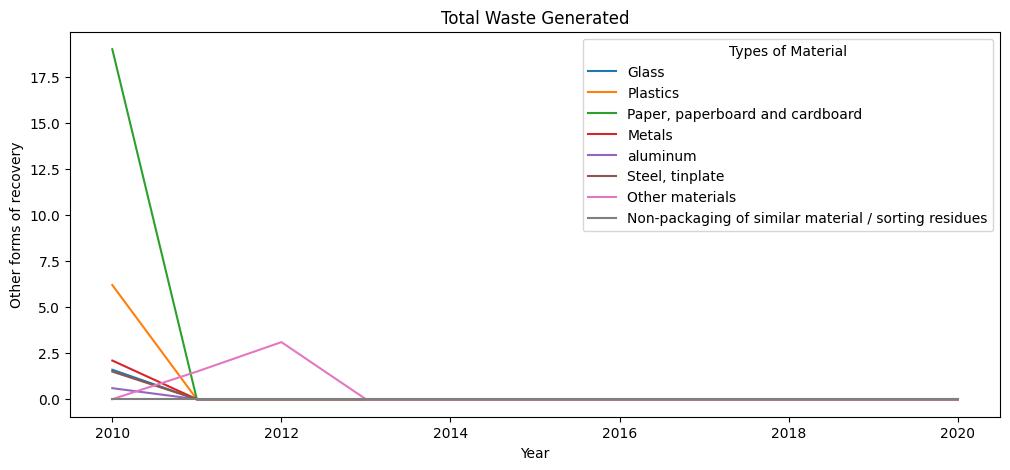

In [32]:
plt.figure(figsize=(12,5))
sns.lineplot(x= 'Year' , y = 'Other forms of recovery', hue = 'Types of Material' , data = df)
plt.title("Total Waste Generated") 

In [45]:
df_Recycling= df.pivot_table(index='Types of Material', 
                              values=['Mechanical Recycling', 'Other forms of recycling'],
                              aggfunc='sum')
df_Recycling

,Mechanical Recycling,Other forms of recycling
Types of Material,,
Glass,17364.8,1.2
Metals,3785.0,167.0
Non-packaging of similar material / sorting residues,64.0,6.8
Other materials,946.4,1.2
"Paper, paperboard and cardboard",13560.8,427.6
Plastics,5866.7,322.5
"Steel, tinplate",1718.9,25.0
aluminum,374.6,5.5


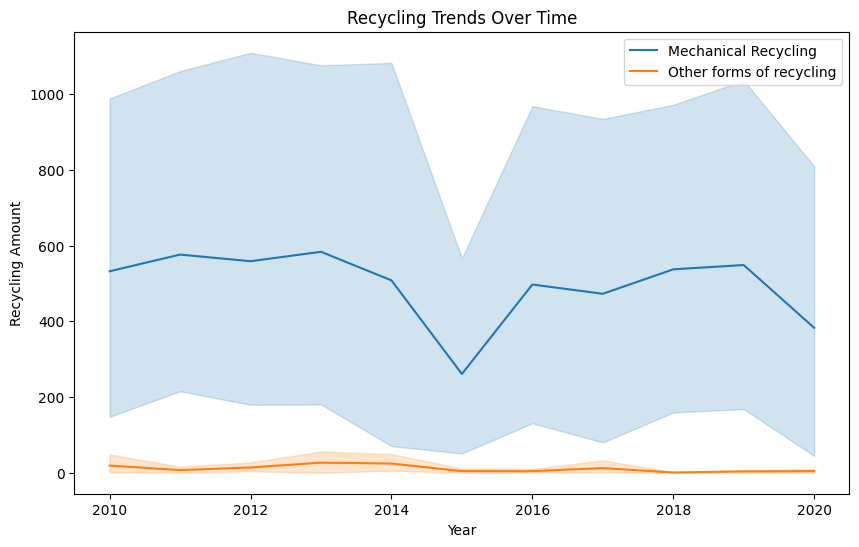

In [47]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot Mechanical Recycling
sns.lineplot(x='Year', y='Mechanical Recycling', data=df, label='Mechanical Recycling')

# Plot Other forms of recycling
sns.lineplot(x='Year', y='Other forms of recycling', data=df, label='Other forms of recycling')

plt.title('Recycling Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Recycling Amount')
plt.legend()
plt.show()

**Analysis**

please note: units for energy recovery are not mentioned

Energy recovery appears to be the main form of recovery. From 2010 to 2015, energy recovery seems to be steady above 2000. After 2015 there appears to be a sharp decline, reaching a low (below 2000) in 2016, followed by a incline in 2017 (reaching a new high of 2400). We also see a sharp decline from 2018 to 2019, reaching a new low of 1500 tonnes.  After 2019, energy recovered seems to have a steady incline to 2020.  Other forms of recovery seem to be very low (close to zero) and hence insignificant.

In [46]:
df_Recovery = df.pivot_table(index='Types of Material', 
                              values=['Energy recovery', 'Other forms of recovery'],
                              aggfunc='sum')
df_Recovery

,Energy recovery,Other forms of recovery
Types of Material,,
Glass,0.1,1.6
Metals,0.0,2.1
Non-packaging of similar material / sorting residues,3534.0,0.0
Other materials,73.9,4.6
"Paper, paperboard and cardboard",1.8,19.0
Plastics,7449.2,6.2
"Steel, tinplate",0.0,1.5
aluminum,0.0,0.6


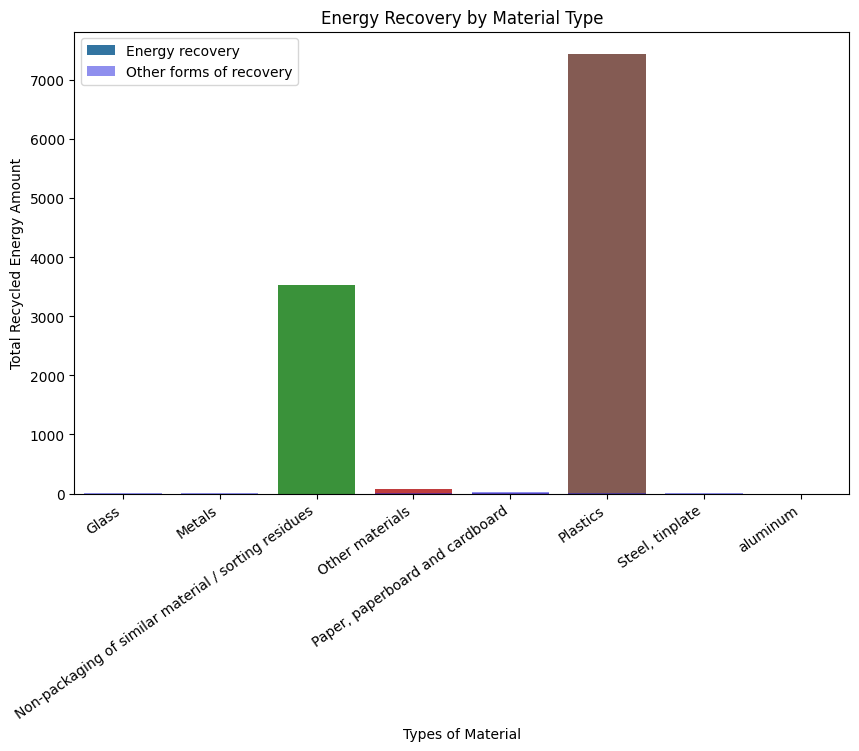

In [62]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Use Seaborn to create a bar plot
sns.barplot(x=df_Recovery.index, y='Energy recovery', data=df_Recovery, label='Energy recovery')
sns.barplot(x=df_Recovery.index, y='Other forms of recovery', data=df_Recovery, label='Other forms of recovery', color='blue', alpha=0.5)

plt.title('Energy Recovery by Material Type')
plt.xlabel('Types of Material')
plt.ylabel('Total Recycled Energy Amount')
plt.xticks(rotation=35, ha='right')  
plt.legend()
plt.show()

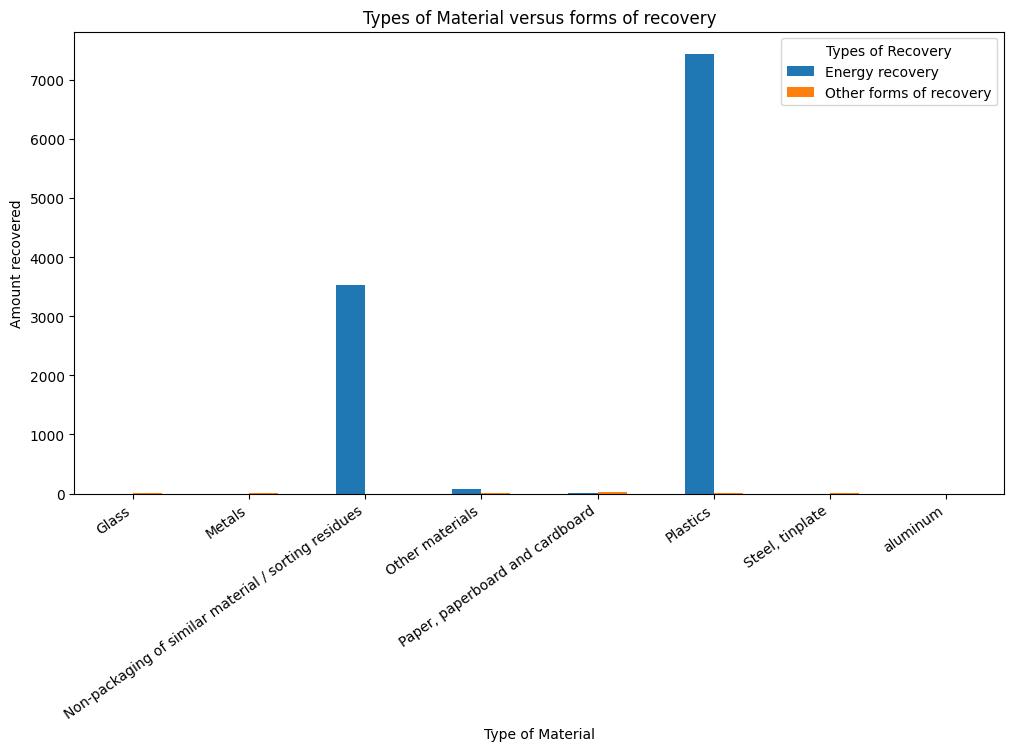

In [61]:
df_Recovery.plot(kind='bar', figsize=(12,6))
plt.title('Types of Material versus forms of recovery')
plt.xlabel('Type of Material')
plt.ylabel('Amount recovered')
plt.legend(title='Types of Recovery')
plt.xticks(rotation=35, ha='right')
plt.show()

Text(0.5, 1.0, 'Other Disposals')

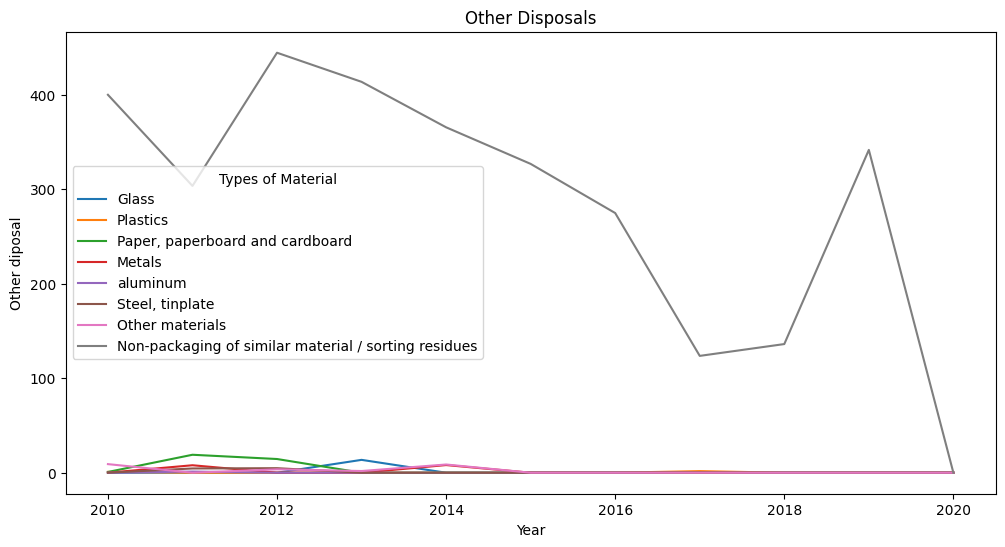

In [59]:
plt.figure(figsize=(12,6))
sns.lineplot(x= 'Year', y= 'Other diposal' , hue = 'Types of Material' , data =df ) 
plt.title('Other Disposals')

**Analysis**

Other disposal is mainly concerned with non-packaging of similar material/sorting residues.

 # **Overall Insights and recommendations**

1) Mechanical Recycling of sales package materials seems to be a well developed industry in German with a steady yearly output.


2) The main materials recycled through mechanical recycling are glass, paper/paperboard/cardboard and plastics. Although, metal, steel/tin plate and aluminumn are also showing significant results and further steps can be taken to increase the recycling of these materials.


3) Energy recovery was significantly high between 2010 and 2018, but had shown a prominent decline from 2018  to early 2019.  Although, from 2020 it is showing a steady increase.  This can be an opportunity to study the rise and decline and identify reasons to further improve energy recovery in the future.


4) The primary material for energy recovery is plastic.  More research can be conducted on the possibility of energy recovery from other materials that are being recycled.